# Day and Night Classifier

The day/night image dataset consists of 400 RGB color images in two categories: day and night. There are equal numbers of each example: 200 day images and 200 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*

In [1]:
import os
import glob
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

## Training and Testing Data

The 400 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

## Load dataset

In [2]:
def load_dataset(image_dir):
    
    im_list = []
    image_types = ['day', 'night']

    for image_type in image_types:  

        for file in glob.glob(os.path.join(image_dir, image_type, '*')):

            # read the image
            im = mpimg.imread(file)

            # check is image exists
            if im is not None:
                # big list with image (numpy array) and it's type
                im_list.append((im, image_type))
                
    return im_list

In [3]:
# image data directories
image_dir_training = 'day_night_images/training/'
image_dir_test = 'day_night_images/test/'

In [4]:
image_training_list = load_dataset(image_dir_training)
print('Total training images', len(image_training_list))

Total training images 240


### Visualize images

Shape:  (737, 1024, 3)
Label:  day


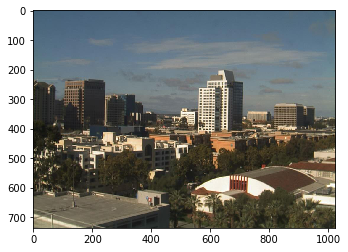

In [5]:
image_index = 0
select_image = image_training_list[image_index][0]
select_label = image_training_list[image_index][1]

plt.imshow(select_image)
print('Shape: ', select_image.shape)
print('Label: ', select_label)

Shape:  (458, 800, 3)
Label:  night


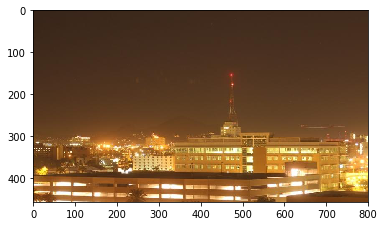

In [6]:
image_index = 120
select_image = image_training_list[image_index][0]
select_label = image_training_list[image_index][1]

plt.imshow(select_image)
print('Shape: ', select_image.shape)
print('Label: ', select_label)

##  Pre-process the Data

### Standarize image

In [7]:
def standarize_input(image):
    
    standard_im = cv2.resize(image, (1100, 600))
    
    return standard_im

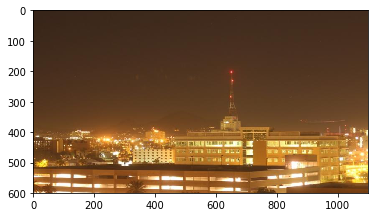

In [8]:
im_st = standarize_input(select_image)
plt.imshow(im_st)

### Encoding labels

In [9]:
def encode(label):
    
    numerical_value = 0
    
    if label == 'day':
        numerical_value = 1
    elif label == 'night':
        numerical_value = 0 
    else:
        print('Error! The label should be day or night')
        
    return numerical_value

### `STANDARDIZED_LIST` of input images and output labels

In [10]:
def standarize(image_list):
    
    standarize_list = []
    
    for image in image_list:
    
        im_standar = standarize_input(image[0])
        label_numerical = encode(image[1])

        standarize_list.append((im_standar, label_numerical))

    return standarize_list

In [11]:
# Standardize all training images
standarize_training_list = standarize(image_training_list)
len(standarize_training_list)

240

### Visualize standardized images

Shape:  (600, 1100, 3)
Label [1 = day, 0 = night]:  1


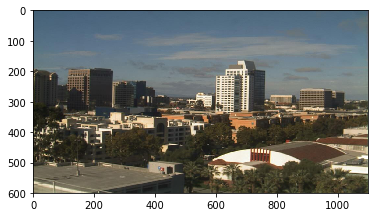

In [12]:
image_index = 0
select_image = standarize_training_list[image_index][0]
select_label = standarize_training_list[image_index][1]

plt.imshow(select_image)
print('Shape: ', select_image.shape)
print('Label [1 = day, 0 = night]: ', select_label)

## Feature Extraction

### RGB to HSV

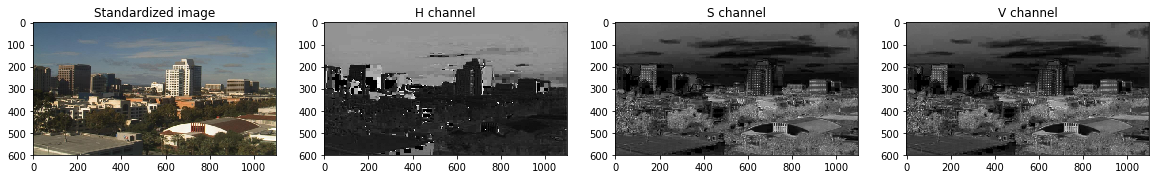

In [13]:
# Convert and image to HSV colorspace
# Visualize the individual color channels

hsv = cv2.cvtColor(select_image, cv2.COLOR_RGB2HSV)

h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))

ax1.set_title('Standardized image')
ax1.imshow(select_image)

ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')

ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')

ax4.set_title('V channel')
ax4.imshow(s, cmap='gray')
plt.show()

In [14]:
def avg_brightness(rgb_image):
    
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    v = hsv[:, :, 2]
    sum_brightness = np.sum(v)
    total_area = rgb_image.shape[0]*rgb_image.shape[1]
    
    avg = sum_brightness/total_area
    
    return avg

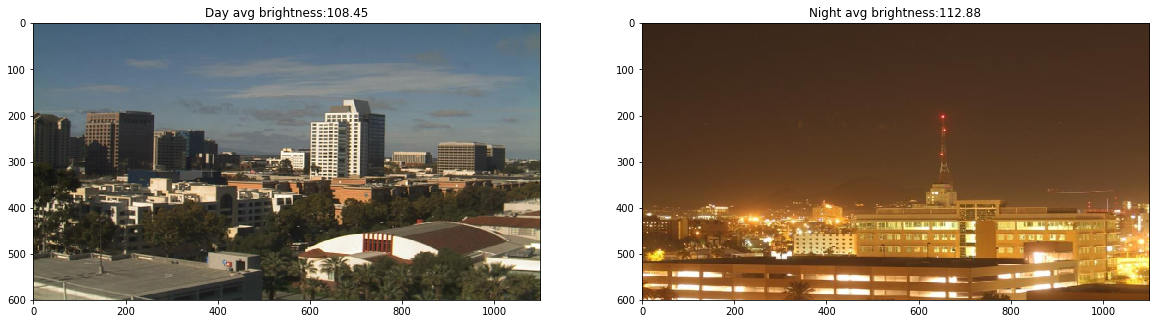

In [15]:
day_index = 0
day_image = standarize_training_list[day_index][0]
day_avg = avg_brightness(day_image)

night_index = 120
night_image = standarize_training_list[night_index][0]
night_avg = avg_brightness(night_image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('Day avg brightness:' + str(round(day_avg, 2)))
ax1.imshow(day_image)

ax2.set_title('Night avg brightness:' + str(round(night_avg, 2)))
ax2.imshow(night_image)

## Classification and Visualizing Error

In [16]:
def estimate_label(rgb_image, threshold=100):
    
    predicted_label  = 0 #night
    
    avg = avg_brightness(rgb_image)
    
    # if the avg brightness is above to threshold the image will be classified as a day
    if avg > threshold:
        predicted_label = 1 #day
        
    return predicted_label 


In [17]:
def classifier(image_list):

    misclassified_images = [] # list of misclassified images: images, true label, predited_label
    total_image = len(image_list)
    count = 0 # amount of correct image predicted

    for image in image_list:  
        predicted_label = estimate_label(image[0])
        true_label = image[1]

        if predicted_label == true_label:
            count += 1
        else:
            misclassified_images.append((image[0], true_label, predicted_label)) # 

    accuracy = count/total_image
    
    return accuracy, misclassified_images


### Training dataset

In [18]:
accuracy, misclassified_images = classifier(standarize_training_list)
total = len(standarize_training_list)
print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(misclassified_images)) +' out of '+ str(total))

Accuracy: 0.9041666666666667
Number of misclassified images = 23 out of 240


### Test dataset

In [19]:
image_test_list = load_dataset(image_dir_test)
standarize_test_list = standarize(image_test_list)

accuracy, misclassified_images = classifier(standarize_test_list)
total = len(standarize_test_list)
print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(misclassified_images)) +' out of '+ str(total))

Accuracy: 0.925
Number of misclassified images = 12 out of 160
